### **Inception ModelV3**

##### Weights : Imagenet

In [14]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the InceptionV3 model so we can do transfer learning
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(128, 128, 3))
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

87916544/87910968 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 63, 63, 32)   96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 63, 63, 32)   0           batch_normalization_7[0][0]      
___________________________

In [15]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

Epoch 1/5
73/73 [==============================] - 15s 205ms/step - loss: 0.2246 - accuracy: 0.9338 - val_loss: 0.3419 - val_accuracy: 0.9143
Epoch 2/5
73/73 [==============================] - 9s 128ms/step - loss: 0.1824 - accuracy: 0.9394 - val_loss: 0.3653 - val_accuracy: 0.9090
Epoch 3/5
73/73 [==============================] - 9s 126ms/step - loss: 0.1722 - accuracy: 0.9405 - val_loss: 0.3214 - val_accuracy: 0.9201
Epoch 4/5
73/73 [==============================] - 9s 125ms/step - loss: 0.1580 - accuracy: 0.9445 - val_loss: 0.3662 - val_accuracy: 0.9187
Epoch 5/5
73/73 [==============================] - 9s 126ms/step - loss: 0.1528 - accuracy: 0.9475 - val_loss: 0.3750 - val_accuracy: 0.9195


[INFO] Plotting model accuracy and Loss


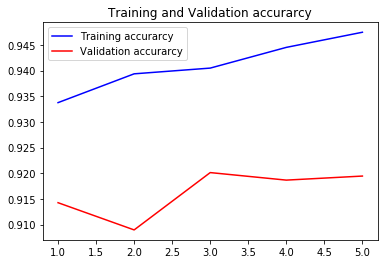

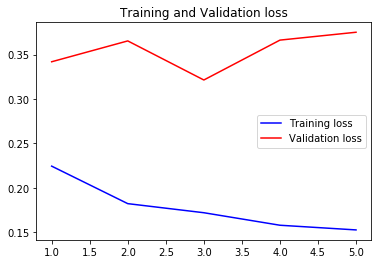

[INFO] Calculating model accuracy
591/591 [==============================] - 1s 2ms/step
Test Accuracy: 91.94585680961609


In [16]:
Res_Plot_Test_Save('Inception_ModelV3_(Imagenet_Weights).h5')

### **Resnet Model**

##### Weights : Imagenet

In [17]:
from keras.models import Model
from keras import applications
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the Resnet model so we can do transfer learning
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (128,128,3))
                             
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [18]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=5, verbose=1
    )

Epoch 1/5
73/73 [==============================] - 37s 503ms/step - loss: 0.2913 - accuracy: 0.9296 - val_loss: 1.6784 - val_accuracy: 0.8770
Epoch 2/5
73/73 [==============================] - 12s 170ms/step - loss: 0.2195 - accuracy: 0.9342 - val_loss: 0.7320 - val_accuracy: 0.8966
Epoch 3/5
73/73 [==============================] - 12s 169ms/step - loss: 0.1777 - accuracy: 0.9402 - val_loss: 0.4398 - val_accuracy: 0.8914
Epoch 4/5
73/73 [==============================] - 12s 170ms/step - loss: 0.1488 - accuracy: 0.9470 - val_loss: 0.5836 - val_accuracy: 0.9007
Epoch 5/5
73/73 [==============================] - 12s 169ms/step - loss: 0.1352 - accuracy: 0.9508 - val_loss: 0.6223 - val_accuracy: 0.8913


[INFO] Plotting model accuracy and Loss


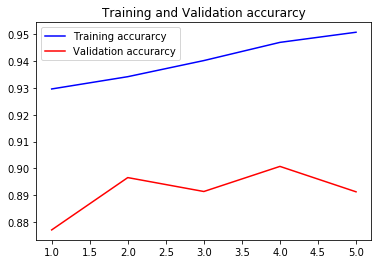

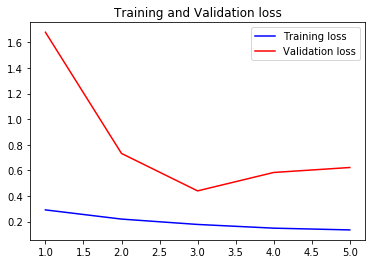

[INFO] Calculating model accuracy
591/591 [==============================] - 1s 2ms/step
Test Accuracy: 89.12577629089355


In [19]:
Res_Plot_Test_Save('Resnet_With_Imagenet_Weingts.h5')

### **VGG16 Model**

##### Weights : Imagenet

In [20]:
from keras.models import Model
from keras.applications import vgg16
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the Resnet model so we can do transfer learning
vgg = vgg16.VGG16(weights= None, include_top=False, input_shape= (128,128,3))
                             
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [21]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=5, verbose=1
    )

Epoch 1/5
73/73 [==============================] - 37s 512ms/step - loss: 0.2045 - accuracy: 0.9377 - val_loss: 0.6399 - val_accuracy: 0.8967
Epoch 2/5
73/73 [==============================] - 12s 171ms/step - loss: 0.1529 - accuracy: 0.9466 - val_loss: 0.3226 - val_accuracy: 0.9103
Epoch 3/5
73/73 [==============================] - 12s 171ms/step - loss: 0.1340 - accuracy: 0.9511 - val_loss: 0.2901 - val_accuracy: 0.9234
Epoch 4/5
73/73 [==============================] - 12s 171ms/step - loss: 0.1166 - accuracy: 0.9574 - val_loss: 0.3271 - val_accuracy: 0.9122
Epoch 5/5
73/73 [==============================] - 12s 171ms/step - loss: 0.1134 - accuracy: 0.9573 - val_loss: 0.6658 - val_accuracy: 0.8945


[INFO] Plotting model accuracy and Loss


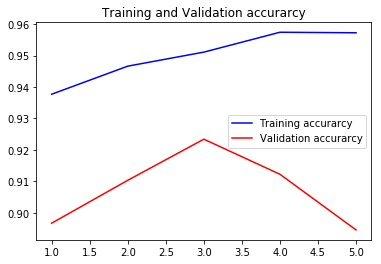

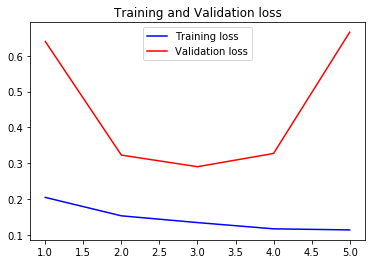

[INFO] Calculating model accuracy
591/591 [==============================] - 1s 2ms/step
Test Accuracy: 89.45289850234985


In [22]:
Res_Plot_Test_Save('VGG16_With_Imagenet_Weingts.h5')

### **VGG19 Model**

##### Weights : Imagenet

In [23]:
from keras.models import Model
from keras.applications import vgg19
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the Resnet model so we can do transfer learning
vgg = vgg19.VGG19(weights= None, include_top=False, input_shape= (128,128,3))
                             
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [24]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=15, verbose=1
    )

Epoch 1/15
73/73 [==============================] - 38s 517ms/step - loss: 0.1633 - accuracy: 0.9454 - val_loss: 0.5625 - val_accuracy: 0.9078
Epoch 2/15
73/73 [==============================] - 12s 170ms/step - loss: 0.1293 - accuracy: 0.9528 - val_loss: 0.7802 - val_accuracy: 0.8934
Epoch 3/15
73/73 [==============================] - 12s 171ms/step - loss: 0.1160 - accuracy: 0.9569 - val_loss: 0.3290 - val_accuracy: 0.9184
Epoch 4/15
73/73 [==============================] - 12s 171ms/step - loss: 0.1015 - accuracy: 0.9622 - val_loss: 0.3210 - val_accuracy: 0.9244
Epoch 5/15
73/73 [==============================] - 12s 171ms/step - loss: 0.1048 - accuracy: 0.9604 - val_loss: 0.3847 - val_accuracy: 0.9168
Epoch 6/15
73/73 [==============================] - 12s 171ms/step - loss: 0.0957 - accuracy: 0.9628 - val_loss: 0.4259 - val_accuracy: 0.9183
Epoch 7/15
73/73 [==============================] - 12s 170ms/step - loss: 0.0923 - accuracy: 0.9658 - val_loss: 0.1756 - val_accuracy: 0.9454

[INFO] Plotting model accuracy and Loss


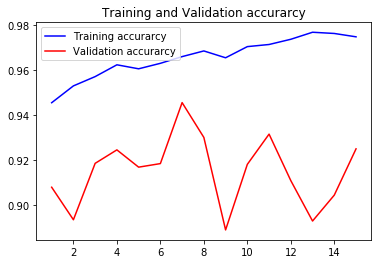

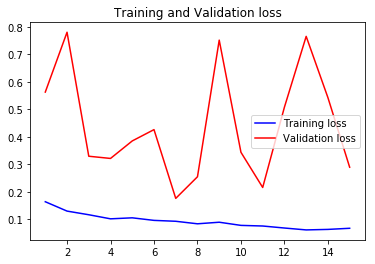

[INFO] Calculating model accuracy
591/591 [==============================] - 1s 2ms/step
Test Accuracy: 92.48730540275574


In [25]:
Res_Plot_Test_Save('VGG19_Imagenet.h5')